# 1. Cambio limitado de monedas
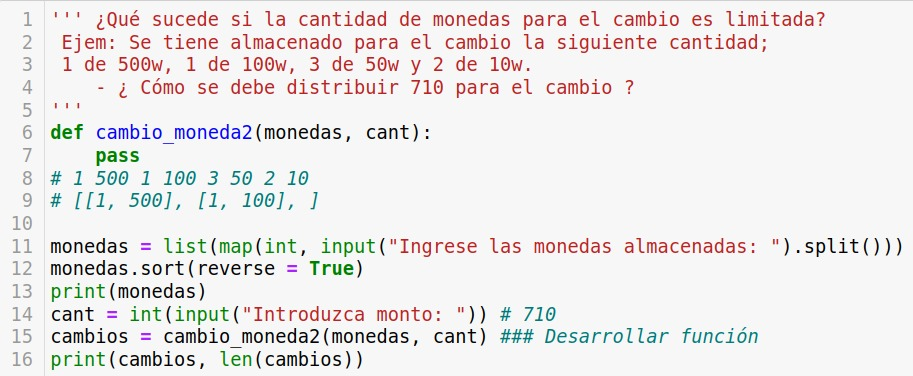

In [21]:
def cambio_moneda2(monedas, cant):
    cambio = []  # Lista para almacenar el cambio dado
    for moneda in monedas:
        valor, cantidad_disponible = moneda
        if cant >= valor:
            # Calcula el número máximo de monedas de esta denominación que se pueden usar
            num_monedas = min(cant // valor, cantidad_disponible)
            cambio.append((valor, num_monedas))
            # Resta el valor total de estas monedas al monto que falta
            cant -= valor * num_monedas
        if cant == 0:
            break
    if cant > 0:
        return "No se puede dar el cambio exacto", cambio
    return cambio

# Ejemplo de uso
monedas = [(500, 1), (100, 1), (50, 3), (20, 5), (10, 2)]
cant = 710
cambios = cambio_moneda2(monedas, cant)
print(cambios)


[(500, 1), (100, 1), (50, 2), (10, 1)]


# 2. Suma máxima
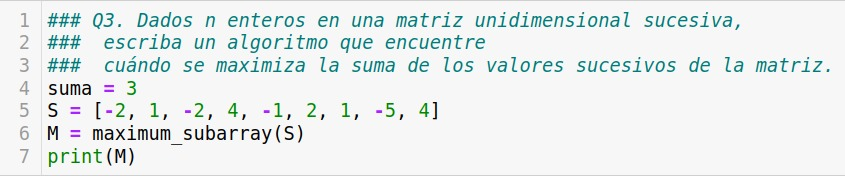

In [18]:
 # Algoritmo de Kadane para encontrar la suma máxima de un subarreglo contiguo.
 # Complejidad: O(n)
 # - GeeksforGeeks: https://www.geeksforgeeks.org/largest-sum-contiguous-subarray/
def maximum_subarray(S):
    max_current = max_global = S[0]
    for i in range(1, len(S)):
        max_current = max(S[i], max_current + S[i])
        if max_current > max_global:
            max_global = max_current
    return max_global

# Ejemplo de uso
S = [-2, 1, -2, 4, -1, 2, 1, -5, 4]
M = maximum_subarray(S)
print("La suma máxima del subarreglo es:", M)

6


# 3. Backtracking - Solución laberinto
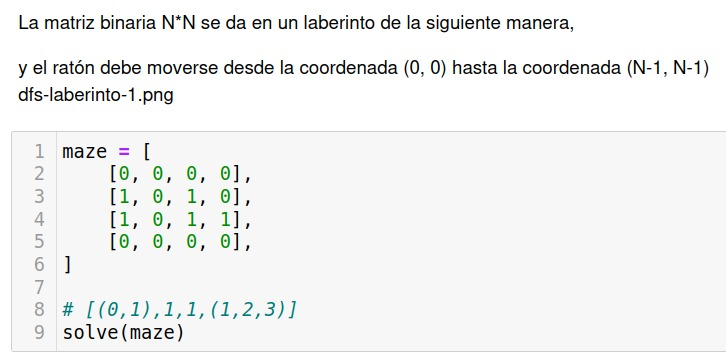

In [23]:
# Implementa una búsqueda en profundidad (DFS) con backtracking para encontrar
# un camino en el laberinto desde la posición inicial (0, 0) hasta la meta (N-1, N-1)
# Marca cada celda visitada para evitar ciclos y retrocede si no encuentra un camino
# - https://www.scaler.com/topics/dfs-python/
def solve_maze(maze):
    N = len(maze)
    path = []

    def is_safe(x, y):
        return 0 <= x < N and 0 <= y < N and maze[x][y] == 0

    def dfs(x, y):
        if x == N - 1 and y == N - 1:
            path.append((x, y))
            return True

        if is_safe(x, y):
            path.append((x, y))
            maze[x][y] = -1

            if dfs(x + 1, y):
                return True
            if dfs(x, y + 1):
                return True
            if dfs(x - 1, y):
                return True
            if dfs(x, y - 1):
                return True

            path.pop()
            maze[x][y] = 0

        return False

    if dfs(0, 0):
        return path
    else:
        return "No hay camino disponible."

maze = [
    [0, 0, 0, 0],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 0, 0, 0]
]

solution = solve_maze(maze)
print(solution)


[(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3)]
